In [1]:
from scipy.io import loadmat
import numpy as np
import utils
from utils import generator
import matplotlib.pylab as plt
import h5py

## Read Formatted MAT recordings

In [2]:
#matdata = h5py.File(r"//storage1.ris.wustl.edu/crponce/Active/Data-Ephys-MAT/Beto64chan-15102019-003_formatted.mat")
matdata = h5py.File(r"D:/Beto64chan-15102019-003_formatted.mat")

In [3]:
print(list(matdata.keys()))

['#refs#', 'Trials', 'lfps', 'meta', 'rasters']


In [4]:
list(matdata['meta'].keys())

['baselineWindowLength',
 'ephysFN',
 'equipment',
 'expControl',
 'expControlFN',
 'imList',
 'pathBHV',
 'pathIMList',
 'pathMat',
 'pathRAW',
 'rasterWindow',
 'sdf',
 'spikeID']

In [65]:
rasters = matdata['rasters'].value

In [70]:
img_names = []
trial_n = matdata['Trials']['imageName'].shape[1]
for i in range(trial_n):
    rf = matdata['Trials']['imageName'][0,i]
    img_names.append(''.join(chr(i) for i in matdata[rf][:]))

In [72]:
import re

In [91]:
syn_mask = np.array([img_fn[:5] == 'block' for img_fn in img_names])
nat_mask = np.array([re.match("\d\d_",img_fn[:3]) is not None for img_fn in img_names])

In [95]:
sum(syn_mask)

1613

In [97]:
re.findall("block(\d+)_thread(\d+)_gen", img_names[1])

[('000', '000')]

In [108]:
img_names

['block000_thread000_gen_places_5_backup_tex',
 'block000_thread000_gen_faces_76_backup_tex',
 '07_n03063599_3679_thread000_nat',
 '03_n04599235_4543_thread000_nat',
 'block000_thread000_gen_faces_54_backup_tex',
 '01_n07836838_2295_thread000_nat',
 'block000_thread000_gen_places_22_backup - Copy_tex',
 'block000_thread000_gen_places_16_backup - Copy_tex',
 'block000_thread000_gen_faces_82_backup_tex',
 '09_block119_gen_Chan233animals_6_backup_tex.jpg_receptive_field_thread000_nat',
 '02_n03482405_29915_thread000_nat',
 '10_n03376595_10755_thread000_nat',
 'block000_thread000_gen_faces_7_backup_tex',
 'block000_thread000_gen_faces_48_backup_tex',
 '06_n01770393_5609_thread000_nat',
 'block000_thread000_gen_artificial_6_backup_tex',
 '02_n03482405_29915_thread000_nat',
 '03_n04599235_4543_thread000_nat',
 '01_n07836838_2295_thread000_nat',
 'block000_thread000_gen_faces_64_backup_tex',
 'block000_thread000_gen_plants_9_backup_tex',
 '04_n03075370_11119_thread000_nat',
 'block000_thread0

In [99]:
syn_geni = np.array([int(re.findall("block(\d+)_thread(\d+)_gen", img_fn)[0][0]) if re.match("block(\d+)_thread(\d+)_gen", img_fn) is not None else -1 for img_fn in img_names])


In [ ]:
nat_geni = 
cur_gen
for i, img_fn in enumerate(img_names):
    

In [67]:
rasters.shape

(2429, 200, 67)

In [11]:
img_name = matdata[rf]
img_name = ''.join(chr(i) for i in img_name[:])

In [14]:
img_path = r'\\storage1.ris.wustl.edu\crponce\Active\Stimuli\2019-Manifold\beto-191015a\backup_10_15_2019_14_25_42'

In [15]:
codes_all, generations = utils.load_codes_mat(img_path)

In [26]:
generations = np.array(generations)

In [19]:
codes_all.shape

(1630, 4096)

In [51]:
from PIL import Image
from time import sleep
dynimage = DynamicImage()

In [46]:
class DynamicImage(object):
    def UpdateFromPIL(self, new_img):
        from io import BytesIO
        from IPython import display
        display.clear_output(wait=True)
        image = BytesIO()
        new_img.save(image, format='png')
        display.display(display.Image(image.getvalue()))

In [94]:
codes_all.shape

(1630, 4096)

In [63]:
from IPython import display
%matplotlib noteboo

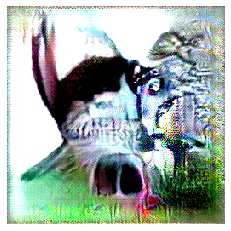

Code displacement norm: 299.0


In [64]:
delta_gen = 4
geni = 35
for geni in range(1,40):
    codegen1 = codes_all[generations == geni, :]
    #codegen2 = codes_all[generations == geni + delta_gen, :]
    d_code = np.mean(codegen1, axis=0)# - np.mean(codegen1, axis=0)
    d_norm = np.linalg.norm(d_code)
    img = generator.visualize(d_code / d_norm *300)
    display.clear_output(wait=True)
    print("Code displacement norm: %.1f"% d_norm)
    plt.subplot(121)
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(122)
    plt.scatter(generations[generations < geni + 1], )
    plt.show()
#     vis = Image.fromarray(img)
#     dynimage.UpdateFromPIL(vis)
    
    sleep(0.8)

In [100]:
generations

array([-1, -1, -1, ..., 39, 39, 39])

In [107]:
print(generations[30:71])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1]
